# Build an IA to buy your car

You are working as a data expert for a year now(no), you have save enough money to buy yourself a car. As a data expert and kind of needy, you want the best at the best price.
Imagine that you are aware of theses data stocked at CarDekho, which contain the informations on a large car's varieties, inclued their prices. You realise that you can use theses data to make a great deal. You can determinate how much you should pay for a specific car type. It sure can be useful while you meet a tough car's seller.
The question is how will you use theses data to know the price to pay.(


## 1.First step load the data in pandas.

You will use pandas to load .csv, trough pandas you can read accross the file it will be stock in a variable aslike **car_data**


In [1]:
#IMPORT LIBRAIRIES
##OS
import time
from sqlalchemy import create_engine
##Dieu
import pandas as pd
##Calculation
import numpy as np
from scipy import stats
from sklearn import linear_model 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm
#Graph
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
#Dash
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

In [2]:
def fitline(x,y):
    #     Ajuste une droite d'équation a*x + b sur les points (x, y) par la méthode
    # des moindres carrés.

    # Args :
    #     * x (list): valeurs de x
    #     * y (list): valeurs de y

    # Return:
    #     * slope (float): pente de la droite
    #     * intercept (float): ordonnée à l'origine
    npoints = len(x)
    # calculs des parametres slope & intercept
    slope = (npoints * (x*y).sum() - x.sum()*y.sum()) / (npoints*(x**2).sum() - (x.sum())**2)
    intercept = ((x**2).sum()*y.sum() - x.sum() * (x*y).sum()) / (npoints * (x**2).sum() - (x.sum())**2)
    # renvoie des parametres
    return slope , intercept

def prediction(x):
    return slope * x + intercept

start_time = time.time()
def importdata(x, link, table):
    
    print("Reading data..")
    col = x.split()
    start_time = time.time()
    df = pd.read_csv(link, encoding="UTF-8")
    df.columns = col
    print("Done.")
    df.to_sql(table, con = engine, if_exists='append', index=False)
    return print("-- Loading time : %s secondes. --" % (time.time() - start_time))

# def r2_calculation(x,y):
#     # P2 = np.polyfit(valeur_T,valeur_min, 2)
# # p= np.poly1d(P2)
# # yhat = p(valeur_T)
# # ybar = sum(valeur_min)/len(valeur_min)
# # SST = sum((valeur_min - ybar)**2)
# # SSreg = sum((yhat - ybar)**2)

# # R2 = SSreg/SST
# # print R2
#     # yhat = predict(x)
#     # ybar = sum(y)/len(y
#     # SST = sum((y - ybar)**2)
#     # SSreg = sum((yhat - ybar)**2)

## 2. Explore data

Explore data, what does they mean ? What is their weight. Output basic stats(Mean,median,distribution,histogramme).

In [3]:
df = pd.read_csv('../data/carData2.csv')
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_TypeInt,Seller_Bool,Transmission_Bool
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,0.405316,0.352159,0.867110
std,2.891554,5.082812,8.644115,38886.883882,0.247915,0.801148,0.478439,0.340021
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,1.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,1.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,0.000000,1.000000,1.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,2.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Selling_Price'}>,
        <AxesSubplot:title={'center':'Present_Price'}>],
       [<AxesSubplot:title={'center':'Kms_Driven'}>,
        <AxesSubplot:title={'center':'Owner'}>,
        <AxesSubplot:title={'center':'Fuel_TypeInt'}>],
       [<AxesSubplot:title={'center':'Seller_Bool'}>,
        <AxesSubplot:title={'center':'Transmission_Bool'}>,
        <AxesSubplot:>]], dtype=object)

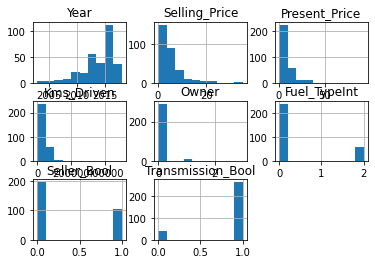

In [4]:
# histogramme
df.hist()

## 3.  Import your data in a MySQL database/table. From here , your data need to be loaded from the MySQL server.

### Database and table creation
```
use dataAi;

drop table if exists cardata;

create table cardata(
Car_Name VARCHAR(50)
,Year INT(4)
,Selling_Price FLOAT(4)
,Present_Price FLOAT(4)
,Kms_Driven INT(10)
,Fuel_Type VARCHAR(50) 
,Seller_Type VARCHAR(50)
,Transmission VARCHAR(50)
,Owner INT(5)
,Fuel_TypeInt INT(3)
,Seller_Bool TINYINT(1)
,Transmission_Bool TINYINT(1)
)
; 
```

In [21]:
#Connection MySQL 
engine = create_engine("mysql+pymysql://root@localhost/dataAi")
####df = pd.read_sql_table('cardata',engine)
#OR
df = pd.read_csv('../data/carData2.csv')

import_column = "Car_Name   Year    Selling_Price   Present_Price   Kms_Driven    Fuel_Type     Seller_Type     Transmission    Owner    Fuel_TypeInt   Seller_Bool    Transmission_Bool"

# Data cleaning on passe des bolean pour Transmission, SellerType et du Int pour Fuel.
# df2 = pd.read_csv('./carData.csv')

# df2['Fuel_TypeInt'] = df2['Fuel_Type'].replace({'Petrol':0, 'CNG':1, 'Diesel':2})
# df2['Seller_Bool'] = df2['Seller_Type'].astype('category').cat.codes
# df2['Transmission_Bool'] = df2['Transmission'].replace({'Manual':1, 'Automatic':0})

# df2.to_csv('../data/carData2.csv',index=False)

# importdata(import_column,'../data/carData2.csv', 'cardata')

## 4. Establish plot with Seaborn
Espacially with the command `catplot`, explain why it is accurate.

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

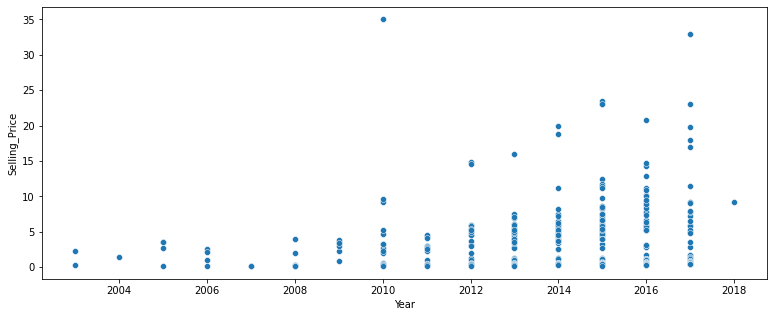

In [6]:
fig_dims = (13,5)
fig , ax =plt.subplots(figsize = fig_dims)
sns.scatterplot(x = 'Year', y = 'Selling_Price', data = df)

In [7]:
trace1 =go.Scatter(
                    x = df['Fuel_Type'],
                    y = df['Selling_Price'],
                    mode = "markers",
                    name = "Selling",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = df.Fuel_Type)
trace2 =go.Scatter(
                    x = df['Fuel_Type'],
                    y = df['Present_Price'],
                    mode = "markers",
                    name = "Present",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = df.Fuel_Type)
data = [trace1, trace2]
layout = dict(title = 'Prix en fonction du carburant',
              xaxis = dict(title = 'Carburant',ticklen = 5,zeroline = False),
              yaxis = dict(title = 'Prix',ticklen= 5,zeroline = False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

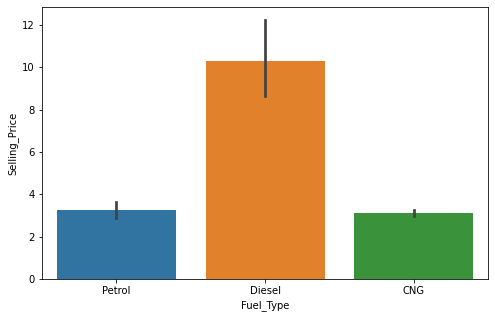

In [8]:
fig_dims = (8,5)
fig , ax =plt.subplots(figsize = fig_dims)
sns.barplot(x='Fuel_Type', y='Selling_Price', data=df)

<AxesSubplot:xlabel='Fuel_Type', ylabel='Present_Price'>

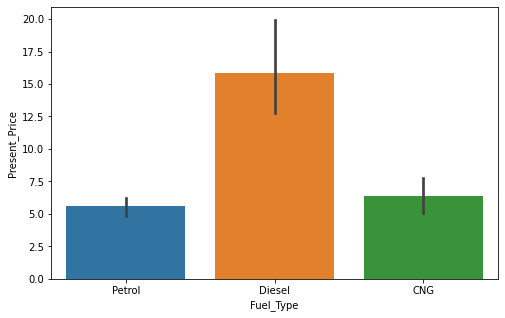

In [9]:
fig_dims = (8,5)
fig , ax =plt.subplots(figsize = fig_dims)
sns.barplot(x='Fuel_Type', y='Present_Price', data=df)

In [10]:
# Messing with seaborn(benchmarking)
# # sns.distplot('Fuel_TypeInt', kde = True)
# # sns.pairplot(df, hue ='Seller_Bool', bw=1.5)

In [11]:
# Messing with seaborn(benchmarking) still
# sns.catplot( y='Year', x='Kms_Driven',data=df)

In [12]:
# Messing with seaborn(benchmarking) \_(0-0)_/
# sns.catplot(data=car_data, kind="strip", x="Car_Name", y="Selling_Price", hue="Year")

<AxesSubplot:xlabel='Year', ylabel='Selling_Price'>

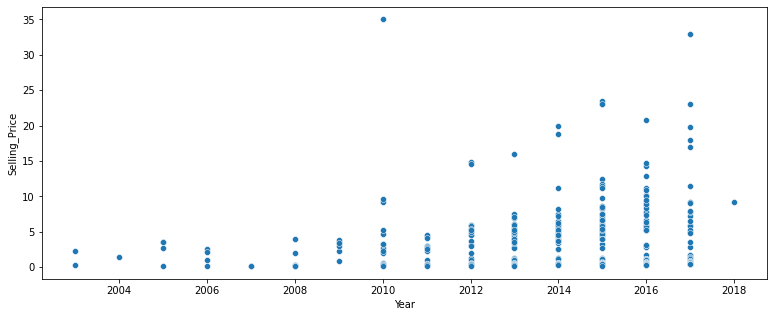

In [13]:
# df['Age'] = 2018 - df['Year'] 
x = df.iloc[0:len(df),1]
y = df.iloc[0:len(df),2]

fig_dims = (13,5)
fig , ax =plt.subplots(figsize = fig_dims)
sns.scatterplot(x=x,y=y,ax=ax)

## 5. Quantify the relationship with s.Year and s.Price

Realise a benchmarking on linear regression. As a reminder the linear regression is a method that expose the relationship between 2 variable in a dataset, such as the price of the care and the of it's creation.
The data scientist use this methode to solve a large , such as a prediction. Is our dataset any good to use this algorythm with ?(Does exist other algorythmes to find the rel between variable?). A plot to visualize your research is needed.

### 5.1. Apply the aglorythm of the Linear Regression with sklearn.

-- Loading time : 42.461018323898315 secondes. --


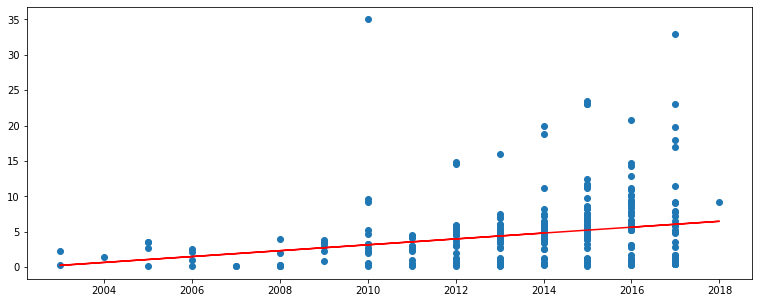

In [14]:
x = df['Year'].values
y = df['Selling_Price'].values

slope , intercept = fitline(x,y)
predict = prediction(x)

print("-- Loading time : %s secondes. --" % (time.time() - start_time))
# Slope est la pente, Intercept c'est le point d'interception entre la pente et une valeur.

plt.figure(figsize=(13,5))
plt.scatter(x,y,label='Values')
plt.plot(x, predict, c='r',label='RegLine')

We need a more curved line to predict more accuratly. 

### 5.2. Apply the aglorythm of the Linear Regression with scipy)

-- Loading time : 42.97469210624695 secondes. --


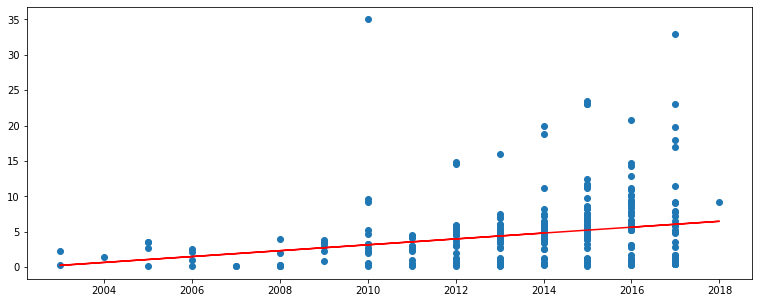

In [15]:
x = df['Year']
y = df['Selling_Price']

model = np.polyfit(x,y,1)
result = np.poly1d(model)
print("-- Loading time : %s secondes. --" % (time.time() - start_time))

plt.figure(figsize=(13,5))
plt.scatter(x,y,label='Values')
plt.plot(x,result(x), c='red',label='RegLine')

### 5.3. Apply the aglorythm of the Linear Regression with sklearn.

-- Loading time : 43.46727204322815 secondes. --
Coéfficient: [0.41509169] Résultat: -831.1789245913279


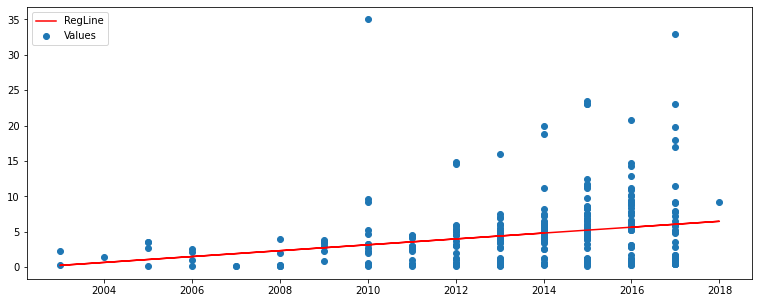

In [16]:
# For some reason need to be reshape everywhere?????
x = df['Year'].values.reshape(-1,1)
y = df['Selling_Price']
#############################

model = linear_model.LinearRegression()
result = model.fit(x,y)
print("-- Loading time : %s secondes. --" % (time.time() - start_time))
print("Coéfficient:",(result.coef_),"Résultat:",(result.intercept_))

plt.figure(figsize=(13,5))
plt.scatter(x,y,label='Values')
plt.plot(x, result.predict(x),'r',label='RegLine')
plt.legend()
plt.show()

### 5.4. Upgrade your model with more viarable like  `Kms_Driven` et `Transmission` (with sklearn).

In [17]:
y = df['Year'].values.reshape(-1,1)
x = df[['Selling_Price','Present_Price']]

model = linear_model.LinearRegression()
result = model.fit(x,y)

print(" -- Loading time : %s secondes. --" % (time.time() - start_time))
# Calcule le R2 
print('R2 Score:',model.score(x,y))
print('Intercept:', model.intercept_,)
print('Coefficients:', model.coef_)

 -- Loading time : 44.059218406677246 secondes. --
R2 Score: 0.3420574604859178
Intercept: [2013.24965204]
Coefficients: [[ 0.69542337 -0.37534635]]


<AxesSubplot:>

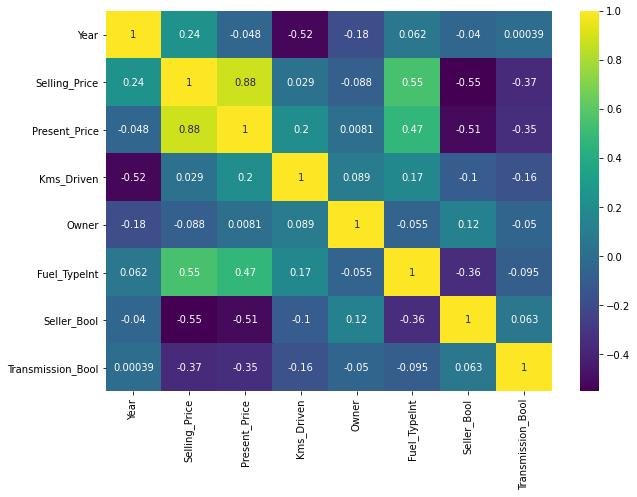

In [20]:
###" PYSQML CON"
#df = pd.read_sql_table('cardata',engine)
#### OR 
df = pd.read_csv('../data/carData2.csv')

df.to_numpy()
# df1 = pd.DataFrame({"Year": df["Year"], "Present_Price": df["Present_Price"], "Selling_Price":df["Selling_Price"], "kms_Driven":df["Kms_Driven"], "Transmission" : df["Transmission_Bool"]})
fig_dims = (10,7)
fig , ax =plt.subplots(figsize = fig_dims)
sns.heatmap(df.corr(), annot=True, cbar = True, cmap ='viridis')

-- Loading time : 2.987105131149292 secondes. --


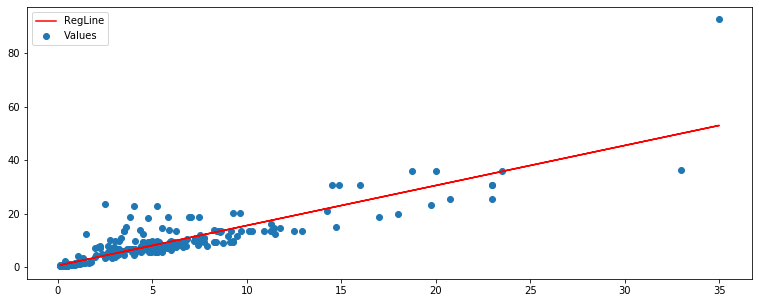

In [19]:
x = df['Selling_Price']
y = df['Present_Price']

model = np.polyfit(x,y,1)
result = np.poly1d(model)
print("-- Loading time : %s secondes. --" % (time.time() - start_time))

plt.figure(figsize=(13,5))
plt.scatter(x,y,label='Values')
plt.plot(x,result(x), c='red', label='RegLine')
plt.legend()
plt.show()

## 5. Create your own Linear Regression py.Class
It need to be from scratch.

In [20]:
class linereg:
    def __init__(self, abscisse, ordonné):
        self.xbis = abscisse
        self.ybis = ordonné
    def fitline(self):
        npoints = len(self.xbis)
        slope = (npoints * (self.xbis*self.ybis).sum() - self.xbis.sum()*self.ybis.sum()) / (npoints*(self.xbis**2).sum() - (self.xbis.sum())**2)
        intercept = ((self.xbis**2).sum()*self.ybis.sum() - self.xbis.sum() * (self.xbis*self.ybis).sum()) / (npoints * (self.xbis**2).sum() - (self.xbis.sum())**2)
        return slope , intercept
    def prediction(self,slope,intercept):
        return slope * x + intercept

x = df['Year']
y = df['Selling_Price']

feet = linereg(x,y)

t,u = feet.fitline()
feet.prediction(t,u)

0      4.815748
1      4.400657
2      6.061023
3      3.570473
4      4.815748
         ...   
296    5.645932
297    5.230840
298    2.740290
299    6.061023
300    5.645932
Name: Year, Length: 301, dtype: float64

## 6. Do you think SVM can help to solve your Inquery? It need to be justify.

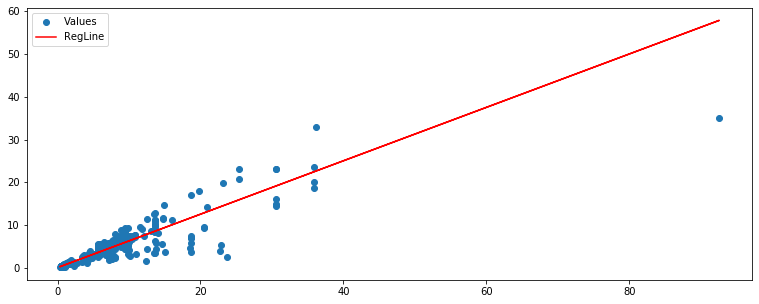

In [21]:
X = df['Present_Price'].values
y = df['Selling_Price']
x = np.array(X).reshape(-1,1)

scaler = StandardScaler()
scaler.fit_transform(x)
regr = svm.SVR(kernel = "linear")
regr.fit(x,y)

resultat = regr.predict(x)

plt.figure(figsize=(13,5))
plt.plot(x, y, 'o', label='Values')
plt.plot(x, resultat, 'r', label='RegLine')
plt.legend()
plt.show()

## 7. Host your work on Github
[Here's the repository](https://github.com/ejhb/audit/tree/master/2020-11-02-brief-car)

## 8. Etablish a dashboard as a support of your research.

```$ python car_dash_svr.py``` then go to http://127.0.0.1:8050/

![alt text](../img/dash_screen.png "Les Gnocchis sont cuits")

## 9. Bonus Question : You found your car at the best price, sadly it stop work in the next 3 days. What kind of data are missing in your research? 

The kind of data that are missing is if the car, brand, model got previous known issues.